# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

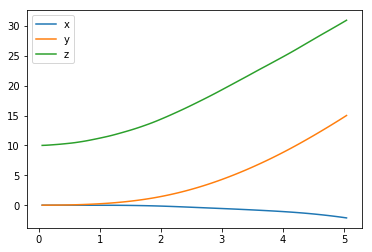

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

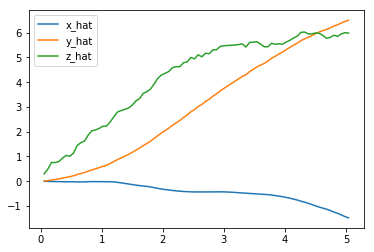

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

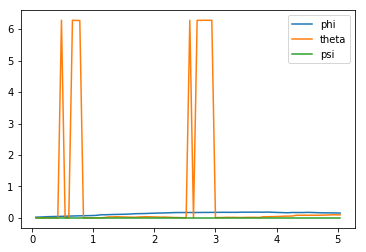

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

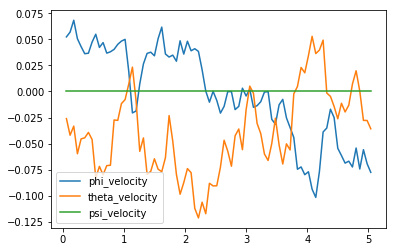

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

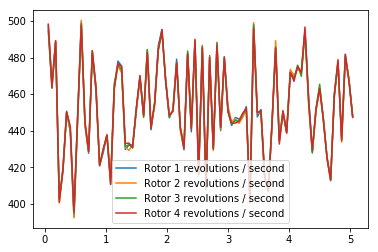

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -2.13583664  15.01526964  30.96690285   0.15331667   0.09674978   0.        ]
[-1.48106378  6.50241373  5.9831239 ]
[-0.07754095 -0.0357942   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   10, score = 134.974 (best = 136.272), noise_scale = 0.1625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [16]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.Agent import DDPG
from task import Task

num_episodes = 1000

start_pos = np.array([1., 1., 1., 0.01, 0.01, 0.01])
target_pos = np.array([10., 10., 10.])

task = Task(init_pose=start_pos, target_pos=target_pos)

agent = DDPG(task) 

quad_output = 'quad_output.txt'

quad_labels = ['i_episode', 'score', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']


quad_results = {x : [] for x in quad_labels}


with open(quad_output, 'w') as csvfile:
    quad_writer = csv.writer(csvfile)
    quad_writer.writerow(quad_labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            
            next_state, reward, done = task.step(action)
            agent.step(action,reward, next_state, done)
            state = next_state

            if done:
                score = agent.total_reward/agent.count
                
                print("\r Episode = {:4d}, score = {:7.3f}, pos={}".format(
                    i_episode, score, task.sim.pose[:3], end=""))  # [debug]
                quad_to_write = [i_episode]+ [score] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
               
                for ii in range(len(quad_labels)):
                    quad_results[quad_labels[ii]].append(quad_to_write[ii])
                quad_writer.writerow(quad_to_write)

                break             
            
    sys.stdout.flush()

 Episode =    1, score = 235.188, pos=[ 0.70779485  1.06430034  0.        ]
 Episode =    2, score = 235.010, pos=[ 0.76226749  0.89905665  0.        ]
 Episode =    3, score = 235.369, pos=[ 0.84327708  1.19067036  0.        ]
 Episode =    4, score = 235.614, pos=[ 1.05065639  1.1354574   0.        ]
 Episode =    5, score = 235.370, pos=[ 1.19724602  1.04642502  0.        ]
 Episode =    6, score = 235.333, pos=[ 0.86375165  0.93279068  0.        ]
 Episode =    7, score = 235.492, pos=[ 1.0305971   0.98026928  0.        ]
 Episode =    8, score = 235.644, pos=[ 0.78208811  1.00567098  0.        ]
 Episode =    9, score = 234.972, pos=[ 0.68647593  0.98857607  0.        ]
 Episode =   10, score = 236.139, pos=[ 1.42874387  1.08393886  0.        ]
 Episode =   11, score = 236.499, pos=[ 1.37165694  1.02406292  0.        ]
 Episode =   12, score = 236.805, pos=[ 1.96325659  1.01088901  0.        ]
 Episode =   13, score = 237.265, pos=[ 1.89345392  1.21411584  0.        ]
 Episode =  

 Episode =  109, score = 237.487, pos=[ 1.32126761  1.01109723  0.        ]
 Episode =  110, score = 235.046, pos=[ 0.51858622  0.99818803  0.        ]
 Episode =  111, score = 238.365, pos=[ 1.76037692  1.00956543  0.        ]
 Episode =  112, score = 235.579, pos=[ 0.85351153  1.00057699  0.        ]
 Episode =  113, score = 237.808, pos=[ 1.2592218   1.00753649  0.        ]
 Episode =  114, score = 236.243, pos=[ 0.80393873  1.00468586  0.        ]
 Episode =  115, score = 234.822, pos=[ 0.42067938  1.0008752   0.        ]
 Episode =  116, score = 237.951, pos=[ 1.2883876  1.0085705  0.       ]
 Episode =  117, score = 237.174, pos=[ 1.39997996  0.99815898  0.        ]
 Episode =  118, score = 238.034, pos=[ 1.26789744  1.01344206  0.        ]
 Episode =  119, score = 235.837, pos=[ 0.99569894  0.99633064  0.        ]
 Episode =  120, score = 236.121, pos=[ 0.84131011  1.01074584  0.        ]
 Episode =  121, score = 237.908, pos=[ 1.65730732  1.00227262  0.        ]
 Episode =  122

 Episode =  217, score = 235.053, pos=[ 0.64772758  0.98348528  0.        ]
 Episode =  218, score = 236.589, pos=[ 1.39486305  1.09072029  0.        ]
 Episode =  219, score = 235.937, pos=[ 0.95073132  1.36223742  0.        ]
 Episode =  220, score = 233.816, pos=[ 0.67855689  0.66914746  0.        ]
 Episode =  221, score = 234.544, pos=[ 0.83201739  0.73726918  0.        ]
 Episode =  222, score = 232.624, pos=[ 0.46069256  0.39772914  0.        ]
 Episode =  223, score = 233.065, pos=[ 0.91046004  0.12644672  0.        ]
 Episode =  224, score = 237.512, pos=[ 2.35771586  1.14396072  0.        ]
 Episode =  225, score = 234.325, pos=[ 0.51697925  1.0153713   0.        ]
 Episode =  226, score = 235.775, pos=[ 0.87175791  1.32388708  0.        ]
 Episode =  227, score = 236.907, pos=[ 1.36013723  1.29961689  0.        ]
 Episode =  228, score = 235.879, pos=[ 1.41680864  0.99973909  0.        ]
 Episode =  229, score = 234.279, pos=[ 0.91235696  0.60493354  0.        ]
 Episode =  

 Episode =  325, score = 236.280, pos=[ 0.98600373  1.10628668  0.        ]
 Episode =  326, score = 236.269, pos=[ 0.98600344  1.10536167  0.        ]
 Episode =  327, score = 236.275, pos=[ 0.98600359  1.10549252  0.        ]
 Episode =  328, score = 236.272, pos=[ 0.98600352  1.10485406  0.        ]
 Episode =  329, score = 236.267, pos=[ 0.98600339  1.10440937  0.        ]
 Episode =  330, score = 236.282, pos=[ 0.98600367  1.10594929  0.        ]
 Episode =  331, score = 236.277, pos=[ 0.98600348  1.10557649  0.        ]
 Episode =  332, score = 236.280, pos=[ 0.98600336  1.10593734  0.        ]
 Episode =  333, score = 236.273, pos=[ 0.9860025   1.10505308  0.        ]
 Episode =  334, score = 236.279, pos=[ 0.9860022   1.10621756  0.        ]
 Episode =  335, score = 236.277, pos=[ 0.98600267  1.1055581   0.        ]
 Episode =  336, score = 236.274, pos=[ 0.98600255  1.10479095  0.        ]
 Episode =  337, score = 236.272, pos=[ 0.98600223  1.10524252  0.        ]
 Episode =  

 Episode =  434, score = 236.022, pos=[ 1.20096884  1.00289772  0.        ]
 Episode =  435, score = 234.460, pos=[ 0.65108834  0.79226589  0.        ]
 Episode =  436, score = 233.884, pos=[ 0.45688115  0.89458602  0.        ]
 Episode =  437, score = 234.469, pos=[ 0.63874242  0.75959399  0.        ]
 Episode =  438, score = 236.016, pos=[ 1.26383276  0.92850442  0.        ]
 Episode =  439, score = 234.911, pos=[ 1.78083151  0.33295055  0.        ]
 Episode =  440, score = 235.138, pos=[ 0.69491558  1.3896584   0.        ]
 Episode =  441, score = 235.233, pos=[ 0.34667863  1.96614861  0.        ]
 Episode =  442, score = 237.150, pos=[ 1.39393069  1.85360938  0.        ]
 Episode =  443, score = 234.424, pos=[ 1.28725994  0.70907145  0.        ]
 Episode =  444, score = 234.174, pos=[ 0.62339501  0.99669594  0.        ]
 Episode =  445, score = 234.783, pos=[ 0.50041084  1.13429947  0.        ]
 Episode =  446, score = 233.735, pos=[ 0.67134115  0.62809637  0.        ]
 Episode =  

 Episode =  544, score = 236.205, pos=[ 0.97313015  1.21018836  0.        ]
 Episode =  545, score = 236.248, pos=[ 0.94538494  1.24086139  0.        ]
 Episode =  546, score = 234.477, pos=[ 0.57888725  0.89675606  0.        ]
 Episode =  547, score = 235.698, pos=[ 1.29422847  1.35908559  0.        ]
 Episode =  548, score = 235.886, pos=[ 1.1216317   1.22071491  0.        ]
 Episode =  549, score = 232.861, pos=[-0.19616991  0.90187517  0.        ]
 Episode =  550, score = 232.767, pos=[-0.1967997   0.86268069  0.        ]
 Episode =  551, score = 236.009, pos=[ 0.83479111  1.40638517  0.        ]
 Episode =  552, score = 236.267, pos=[ 0.93975629  1.24903067  0.        ]
 Episode =  553, score = 235.185, pos=[ 1.35578439  0.71016887  0.        ]
 Episode =  554, score = 236.253, pos=[ 0.94851656  1.23814015  0.        ]
 Episode =  555, score = 236.168, pos=[ 1.02411836  1.16563495  0.        ]
 Episode =  556, score = 236.324, pos=[ 0.93124786  1.26882349  0.        ]
 Episode =  

 Episode =  653, score = 236.157, pos=[ 1.05731288  0.96354591  0.        ]
 Episode =  654, score = 236.106, pos=[ 1.2642512   0.87642662  0.        ]
 Episode =  655, score = 233.031, pos=[-0.02189403  0.78215244  0.        ]
 Episode =  656, score = 235.974, pos=[ 0.77811509  1.43989659  0.        ]
 Episode =  657, score = 236.300, pos=[ 0.91661     1.27082554  0.        ]
 Episode =  658, score = 235.367, pos=[ 0.89179956  1.03215307  0.        ]
 Episode =  659, score = 235.075, pos=[ 0.75427323  1.19033261  0.        ]
 Episode =  660, score = 236.036, pos=[ 0.86375812  1.39477431  0.        ]
 Episode =  661, score = 236.154, pos=[ 1.01951964  1.1676454   0.        ]
 Episode =  662, score = 236.275, pos=[ 0.94112922  1.25043904  0.        ]
 Episode =  663, score = 236.138, pos=[ 1.03682148  1.15323796  0.        ]
 Episode =  664, score = 236.121, pos=[ 1.07274103  1.12662591  0.        ]
 Episode =  665, score = 236.272, pos=[ 0.94182953  1.25017057  0.        ]
 Episode =  

 Episode =  762, score = 230.634, pos=[-0.17121022  0.32605799  0.        ]
 Episode =  763, score = 228.931, pos=[-1.58677978  2.0344601   0.        ]
 Episode =  764, score = 234.566, pos=[ 0.7784788   0.82535907  0.        ]
 Episode =  765, score = 234.796, pos=[ 0.80952446  0.98366726  0.        ]
 Episode =  766, score = 234.938, pos=[ 0.67633039  1.26779488  0.        ]
 Episode =  767, score = 233.623, pos=[ 0.65881146  0.64843528  0.        ]
 Episode =  768, score = 234.076, pos=[ 0.73259149  1.74971874  0.        ]
 Episode =  769, score = 233.479, pos=[ 0.19033882  0.98469291  0.        ]
 Episode =  770, score = 234.762, pos=[ 0.55324237  1.06101084  0.        ]
 Episode =  771, score = 232.932, pos=[ 0.32259035  0.69099716  0.        ]
 Episode =  772, score = 234.470, pos=[ 0.81285074  0.84495336  0.        ]
 Episode =  773, score = 235.069, pos=[ 0.86390752  0.97570351  0.        ]
 Episode =  774, score = 235.175, pos=[ 1.39955541  0.62259197  0.        ]
 Episode =  

 Episode =  870, score = 235.262, pos=[ 1.41448882  0.84480414  0.        ]
 Episode =  871, score = 234.292, pos=[ 1.48585594  0.62654321  0.        ]
 Episode =  872, score = 232.548, pos=[-0.59827252  1.04407425  0.        ]
 Episode =  873, score = 237.508, pos=[ 3.07326978  1.83074582  0.        ]
 Episode =  874, score = 230.971, pos=[-0.9521147   0.49427501  0.        ]
 Episode =  875, score = 228.359, pos=[-1.29719005 -0.06414394  0.        ]
 Episode =  876, score = 234.865, pos=[ 1.38878318  0.74329125  0.        ]
 Episode =  877, score = 234.172, pos=[ 0.54182954  1.07159047  0.        ]
 Episode =  878, score = 235.413, pos=[ 1.43973636  0.55967961  0.        ]
 Episode =  879, score = 235.610, pos=[ 0.86211256  1.22189397  0.        ]
 Episode =  880, score = 235.384, pos=[ 1.32440881  0.6700248   0.        ]
 Episode =  881, score = 232.272, pos=[ 0.69228691  0.13601631  0.        ]
 Episode =  882, score = 234.803, pos=[ 0.18007072  1.90335717  0.        ]
 Episode =  

 Episode =  978, score = 235.345, pos=[ 1.21434666  1.07313127  0.        ]
 Episode =  979, score = 236.234, pos=[ 1.06411652  1.34606465  0.        ]
 Episode =  980, score = 235.750, pos=[ 1.14626315  0.86083827  0.        ]
 Episode =  981, score = 235.208, pos=[ 1.22063812  0.44729882  0.        ]
 Episode =  982, score = 235.186, pos=[ 1.22434316  0.42686081  0.        ]
 Episode =  983, score = 235.769, pos=[ 1.1123775   0.91895095  0.        ]
 Episode =  984, score = 235.156, pos=[ 1.23054619  0.38397421  0.        ]
 Episode =  985, score = 235.301, pos=[ 1.21137374  0.49777594  0.        ]
 Episode =  986, score = 235.716, pos=[ 1.15096229  0.83577367  0.        ]
 Episode =  987, score = 236.052, pos=[ 1.07886706  1.15251065  0.        ]
 Episode =  988, score = 235.820, pos=[ 0.61861023  1.65980332  0.        ]
 Episode =  989, score = 235.490, pos=[ 1.33805171  1.00470504  0.        ]
 Episode =  990, score = 235.497, pos=[ 1.17121836  0.71594434  0.        ]
 Episode =  

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

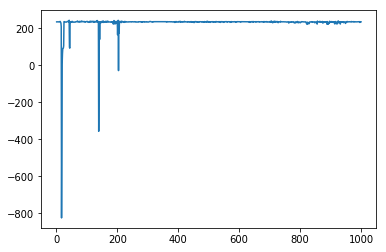

In [17]:
## TODO: Plot the rewards.
plt.plot(quad_results['i_episode'], quad_results['score'], label='score')


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The quadcopter’s Agent is tasked to control the quadcopter while it takes off from a starting co-ordinate (1.0, 1.0, 1.0) to a destination co-ordinate (10.0, 10.0, 10.0).

The reward function uses the state factors  that represent the current state of the simulator representing (x, y, z, phi theta, phi) as well its linear velocities in each of the dimensions represented by x_velocity, y_velocity, and z_velocity.

The goal is to provide positive reward when the quadcopter is close to the destination.  The reward function is staggered to provide more reward when the proximity of the quadcopter to the destination. For example when the proximity is less than 0.25 to the detention, it has the highest positive reward.  The staggered reward is allocated when the quadcopter is within 1 unit of the destination. Staggered rewards differentiates states that are closer to destination while preferring those much closer over others within 1 unit of the destination.

The reward function also punishes the agent at every step using three different attributes:  co-ordinates, Euler angles, and linear velocities.  The ideas is to close the gap between the quadcopter and the destination as soon as possible while attempting to making it as stable as possible.  

In order to keep the reward score within bound negative reward  components are averaged and weighted ( can be consolidated into a single weight instead of averaging) and deducted from the positive reward gained.  A positive reward of 0.2 is allocated for each step.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:


- What learning algorithm(s) did you try? What worked best for you?

  I started with the sample implementation provided with the project which uses Actor-Critic alo
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

The Agent leverages the reference architecture that was supplied with the project.  It uses Actor-Critic algorithm. Both Actor and Critic use Neural Networks to approximate action and value functions.  

The agent defined in class DDPG is provided with the implementation of the class Task that has the definition of the reward function. 

The Agent’s act method leverages the Actor class that returns the appropriate action to take given the current state.  The Actor’s model is built using three Neural Network layers. Each layer uses rely activation function. The first takes the state variables that has 6 factors fed into 32 nodes of the first layer. This output is fed into the second layer that has 64 nodes.  The output from the second layer is fed into the third layer that has 32 nodes. The final connected layer takes the output of the previous layer and uses sigmoid activation function to resolve into the action factors.  These raw actions are further scaled using Lambda layer confine to [0,1] range.  A Keras based optimizer leverages a defined loss functions.  Finally, training function is defined for the actor. When an episode ends, the Agent learns. During this phase, it leverages the training function to train the Actor.

The Agent’s learn function also leverages Critic class which estimates Q-Values for next states an actions.  The Critic’s model is build using  two pathways, one each for states and actions.  Each of these layers have their respective inputs layers followed by 32 node and 64 node layers, each with relu activation.  These two pathways are combined and are activated by rule function.  The final output layer produces the Q-Values for the sates/actions inputs.  A model is then created and complied using Adam optimizer. The Agent leverages its learn function to train the Critic.

After multiple iterations using different size networks and fewer layers, I settled on the defined networks for Actor and Critic.  The returns were random during the trials, and were relatively more stable when using the defined networks.  

Experimented with different values for gamma, tau, mu, theta, and sigma.  I tried different iterations using slight variations form the values I settled on.  But found a stable reward plot when using gamma = 0.005, tau = 0.095, Mu = 0, theta = 0.13, and sigma = 0.001.  


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task is quite challenging and I can see that the quadcopter moves from the starting point, but, needs much more training.  Initially, the z coordinate always remained zero.  I reduced the punishment for z dimension to half in the reward function, after which I noticed movement all dimensions. This behavior is still not consistent and requires more training or changes to implementation.   

The the reward for the first few episodes has lot more variability than for the later episodes.  During the early episodes, no sates are familiar to the agent, so there is much more exploration or unstable q-values for the state/action pairs.  The mean over the final 10 episodes remained in sync with the episodes prior to those 10. 

I have run multiple versions of the reward functions with varying episodes ranging fro 500 to 10000.  I noticed that after having some steady rewards for the episodes, the rewards are random for a certain stretch, like that those states have not been visited previously and the exploration is causing the volatility.  


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The aspect of iteratively running with varying parameters combinations and network architecture for Actor/Critic left me with considerable uncertainity.  I have done considerable preparation reading the text book and watching additional videos on Reinforcement Learning.  All said, I felt that I have leant a lot from the time I got started on the topic.  So, the experience was quite rewarding. 

The concept of building a reward function that is tailored to logic of the desired behavior, on how the association of reward influences the action taken is quite fascinating.  
